In [1]:
## Step 1: Raw Data

# Upload the raw data
import pandas as pd
import numpy as np
import os
df = pd.read_csv('/Users/lilu/Desktop/well_1_realtime_data.csv')
df


,time (time),CasingHeadPressure (psig),WellheadPressure (psig),WellheadTemperature (deg F),GaugePressure (psig),GaugeTemperature (deg F),ChokeSize (none),FlowlinePressure (psig),FlowlineTemperature (deg F),CalculatedFlowingStatus (none),OilRateTested (STB/day),GasRateTested (MMscf/day),WaterRateTested (STB/day)
0,01/01/2014 00:00,2449.960,3075.95,169.588,4569.55,205.575,1.22330,1589.37,140.165,0.0,0.0,0.0,0.0
1,01/01/2014 00:15,2449.430,3075.85,169.576,4569.50,205.577,1.22330,1589.38,140.160,0.0,0.0,0.0,0.0
2,01/01/2014 00:30,2448.940,3075.56,169.568,4569.44,205.577,1.22215,1588.68,140.140,0.0,0.0,0.0,0.0
3,01/01/2014 00:45,2449.060,3078.18,169.580,4569.92,205.576,1.22295,1607.58,140.643,0.0,0.0,0.0,0.0
4,01/01/2014 01:00,2448.820,3078.06,169.571,4569.90,205.577,1.22244,1607.30,140.632,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105211,31/12/2016 22:45,635.831,1949.25,153.032,3893.87,202.382,1.67923,1374.17,139.271,0.0,NaN,NaN,NaN
105212,31/12/2016 23:00,635.802,1949.36,153.035,3893.87,202.383,1.67883,1374.36,139.272,NaN,NaN,NaN,NaN
105213,31/12/2016 23:15,635.905,1949.59,153.037,3893.88,202.383,1.67873,1374.57,139.276,NaN,NaN,NaN,NaN
105214,31/12/2016 23:30,635.876,1949.29,153.037,3893.86,202.383,1.67845,1374.21,139.275,NaN,NaN,NaN,NaN


In [2]:
# Mean values of the raw data
df.mean()

CasingHeadPressure (psig)         1088.420659
WellheadPressure (psig)           2996.872958
WellheadTemperature (deg F)        135.751239
GaugePressure (psig)              4435.175512
GaugeTemperature (deg F)           202.736959
ChokeSize (none)                     1.258673
FlowlinePressure (psig)           1552.413232
FlowlineTemperature (deg F)        120.889608
CalculatedFlowingStatus (none)       0.245999
OilRateTested (STB/day)            409.783276
GasRateTested (MMscf/day)           13.629777
WaterRateTested (STB/day)          -16.709216
dtype: float64

In [3]:
# Standard Deviation of the raw data
df.std()

CasingHeadPressure (psig)         827.959887
WellheadPressure (psig)           788.441168
WellheadTemperature (deg F)        49.404143
GaugePressure (psig)              486.626923
GaugeTemperature (deg F)           13.869747
ChokeSize (none)                    0.739619
FlowlinePressure (psig)           349.723158
FlowlineTemperature (deg F)        41.775018
CalculatedFlowingStatus (none)      0.430680
OilRateTested (STB/day)           988.131342
GasRateTested (MMscf/day)          32.800431
WaterRateTested (STB/day)         102.708469
dtype: float64

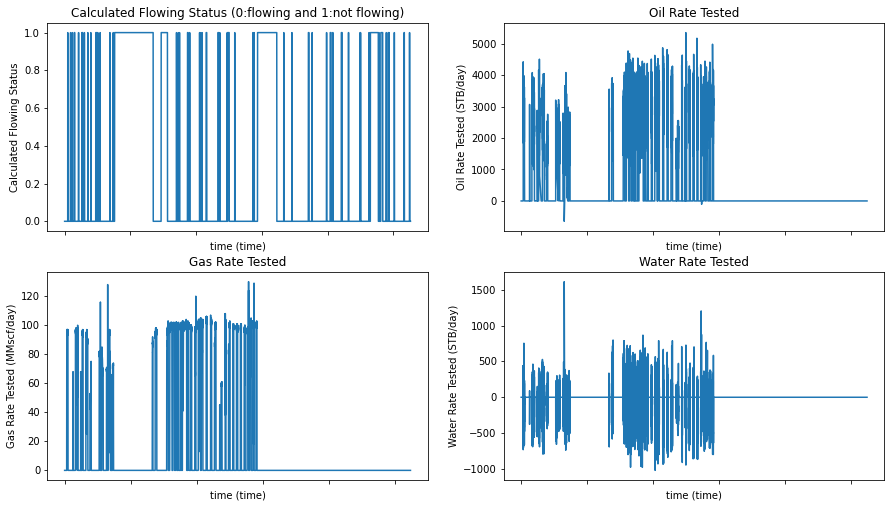

In [4]:
## Step 2: Clean Data

# Plot the Data
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,8.4))

df.plot(x='time (time)',y='CalculatedFlowingStatus (none)',legend=None, ax=axes[0,0]).axes.xaxis.set_ticklabels([])
axes[0,0].set_ylabel("Calculated Flowing Status")
axes[0,0].set_title('Calculated Flowing Status (0:flowing and 1:not flowing)')

df.plot(x='time (time)', y='OilRateTested (STB/day)', kind = 'line',legend=None, ax=axes[0,1]).axes.xaxis.set_ticklabels([])
axes[0,1].set_ylabel("Oil Rate Tested (STB/day)")
axes[0,1].set_title('Oil Rate Tested')

df.plot(x='time (time)', y='GasRateTested (MMscf/day)', kind = 'line',legend=None, ax=axes[1,0]).axes.xaxis.set_ticklabels([])
axes[1,0].set_ylabel("Gas Rate Tested (MMscf/day)")
axes[1,0].set_title('Gas Rate Tested')

df.plot(x='time (time)', y='WaterRateTested (STB/day)', kind = 'line',legend=None, ax=axes[1,1]).axes.xaxis.set_ticklabels([])
axes[1,1].set_ylabel("Water Rate Tested (STB/day)")
axes[1,1].set_title('Water Rate Tested')

plt.show()

In [6]:
# Count the missing values
df.isna().sum()


time (time)                         0
CasingHeadPressure (psig)           0
WellheadPressure (psig)             0
WellheadTemperature (deg F)         0
GaugePressure (psig)                0
GaugeTemperature (deg F)            0
ChokeSize (none)                    0
FlowlinePressure (psig)             0
FlowlineTemperature (deg F)         0
CalculatedFlowingStatus (none)      4
OilRateTested (STB/day)           382
GasRateTested (MMscf/day)         382
WaterRateTested (STB/day)         382
dtype: int64

In [7]:
## Step 3: Selected Features

# only consider the flowing status 0
df1 = df[df["CalculatedFlowingStatus (none)"]==0]

df2 = df1[(df1['OilRateTested (STB/day)'] != 0) & (df1['WaterRateTested (STB/day)'] != 0) & (df1['GasRateTested (MMscf/day)'] != 0)]
df2

,time (time),CasingHeadPressure (psig),WellheadPressure (psig),WellheadTemperature (deg F),GaugePressure (psig),GaugeTemperature (deg F),ChokeSize (none),FlowlinePressure (psig),FlowlineTemperature (deg F),CalculatedFlowingStatus (none),OilRateTested (STB/day),GasRateTested (MMscf/day),WaterRateTested (STB/day)
621,07/01/2014 11:15,2346.080,3078.31,169.643,4561.17,205.557,1.22522,1649.67,141.916,0.0,3478.0,62.0,-42.0
622,07/01/2014 11:30,2345.950,3078.36,169.642,4561.20,205.555,1.22578,1650.10,141.931,0.0,3261.0,89.0,260.0
623,07/01/2014 11:45,2345.840,3078.42,169.642,4561.13,205.555,1.22533,1649.81,141.916,0.0,4422.0,90.0,-656.0
624,07/01/2014 12:00,2345.690,3078.30,169.642,4561.15,205.554,1.22527,1650.92,141.935,0.0,2804.0,93.0,-78.0
625,07/01/2014 12:15,2345.560,3078.34,169.635,4561.13,205.554,1.22539,1650.06,141.928,0.0,2305.0,94.0,155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105207,31/12/2016 21:45,635.695,1948.80,153.018,3893.86,202.383,1.67859,1374.21,139.276,0.0,NaN,NaN,NaN
105208,31/12/2016 22:00,635.741,1949.16,153.022,3893.88,202.383,1.67888,1374.64,139.280,0.0,NaN,NaN,NaN
105209,31/12/2016 22:15,635.784,1949.14,153.027,3893.92,202.383,1.67859,1374.37,139.274,0.0,NaN,NaN,NaN
105210,31/12/2016 22:30,635.803,1949.32,153.030,3893.86,202.383,1.67861,1374.33,139.274,0.0,NaN,NaN,NaN


In [8]:
# Export the dataframe
# pip install dataframe_image
import dataframe_image as dfi
dfi.export(df2,"origi_data.png", max_rows=10)

In [112]:
# Replace all 0 with NA
df1_m = df1
df1_m = df1_m.drop(['time (time)', 'CalculatedFlowingStatus (none)', 'WaterRateTested (STB/day)'], axis = 1) 
df1_m = df1_m.replace(0,np.nan)
df1_m.isna().sum()
df1_m

,CasingHeadPressure (psig),WellheadPressure (psig),WellheadTemperature (deg F),GaugePressure (psig),GaugeTemperature (deg F),ChokeSize (none),FlowlinePressure (psig),FlowlineTemperature (deg F),OilRateTested (STB/day),GasRateTested (MMscf/day)
0,2449.960,3075.95,169.588,4569.55,205.575,1.22330,1589.37,140.165,NaN,NaN
1,2449.430,3075.85,169.576,4569.50,205.577,1.22330,1589.38,140.160,NaN,NaN
2,2448.940,3075.56,169.568,4569.44,205.577,1.22215,1588.68,140.140,NaN,NaN
3,2449.060,3078.18,169.580,4569.92,205.576,1.22295,1607.58,140.643,NaN,NaN
4,2448.820,3078.06,169.571,4569.90,205.577,1.22244,1607.30,140.632,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
105207,635.695,1948.80,153.018,3893.86,202.383,1.67859,1374.21,139.276,NaN,NaN
105208,635.741,1949.16,153.022,3893.88,202.383,1.67888,1374.64,139.280,NaN,NaN
105209,635.784,1949.14,153.027,3893.92,202.383,1.67859,1374.37,139.274,NaN,NaN
105210,635.803,1949.32,153.030,3893.86,202.383,1.67861,1374.33,139.274,NaN,NaN


In [12]:
# Correlation Matrix of the dataset
corr = df1_m.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,CasingHeadPressure (psig),WellheadPressure (psig),WellheadTemperature (deg F),GaugePressure (psig),GaugeTemperature (deg F),ChokeSize (none),FlowlinePressure (psig),FlowlineTemperature (deg F),OilRateTested (STB/day),GasRateTested (MMscf/day)
CasingHeadPressure (psig),1.00,0.74,0.70,0.61,0.12,-0.70,-0.03,-0.30,0.11,0.09
WellheadPressure (psig),0.74,1.00,0.78,0.70,0.11,-0.90,0.04,-0.48,-0.43,-0.45
WellheadTemperature (deg F),0.70,0.78,1.00,0.56,0.10,-0.81,0.21,0.05,-0.29,-0.24
GaugePressure (psig),0.61,0.70,0.56,1.00,0.72,-0.59,0.00,-0.34,-0.43,-0.41
GaugeTemperature (deg F),0.12,0.11,0.10,0.72,1.00,-0.06,-0.02,-0.05,-0.47,-0.45
ChokeSize (none),-0.70,-0.90,-0.81,-0.59,-0.06,1.00,-0.05,0.37,0.36,0.43
FlowlinePressure (psig),-0.03,0.04,0.21,0.00,-0.02,-0.05,1.00,0.65,-0.24,-0.04
FlowlineTemperature (deg F),-0.30,-0.48,0.05,-0.34,-0.05,0.37,0.65,1.00,-0.03,0.11
OilRateTested (STB/day),0.11,-0.43,-0.29,-0.43,-0.47,0.36,-0.24,-0.03,1.00,0.70
GasRateTested (MMscf/day),0.09,-0.45,-0.24,-0.41,-0.45,0.43,-0.04,0.11,0.70,1.00


In [ ]:
# dfi.export(corr.style.background_gradient(cmap='coolwarm').set_precision(2),"corr_ima.png")

In [35]:
## Step 4 and 5: Models and Results

# mean imputation
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
After_imputation_2 = imp.fit_transform(df1_m)

In [36]:
e_dataframe2 = pd.DataFrame(After_imputation_2)
e_dataframe2
e_dataframe2.columns = df1_m.columns
e_dataframe2

,CasingHeadPressure (psig),WellheadPressure (psig),WellheadTemperature (deg F),GaugePressure (psig),GaugeTemperature (deg F),ChokeSize (none),FlowlinePressure (psig),FlowlineTemperature (deg F),OilRateTested (STB/day),GasRateTested (MMscf/day)
0,2449.960,3075.95,169.588,4569.55,205.575,1.22330,1589.37,140.165,2433.734243,89.327303
1,2449.430,3075.85,169.576,4569.50,205.577,1.22330,1589.38,140.160,2433.734243,89.327303
2,2448.940,3075.56,169.568,4569.44,205.577,1.22215,1588.68,140.140,2433.734243,89.327303
3,2449.060,3078.18,169.580,4569.92,205.576,1.22295,1607.58,140.643,2433.734243,89.327303
4,2448.820,3078.06,169.571,4569.90,205.577,1.22244,1607.30,140.632,2433.734243,89.327303
...,...,...,...,...,...,...,...,...,...,...
79325,635.695,1948.80,153.018,3893.86,202.383,1.67859,1374.21,139.276,2433.734243,89.327303
79326,635.741,1949.16,153.022,3893.88,202.383,1.67888,1374.64,139.280,2433.734243,89.327303
79327,635.784,1949.14,153.027,3893.92,202.383,1.67859,1374.37,139.274,2433.734243,89.327303
79328,635.803,1949.32,153.030,3893.86,202.383,1.67861,1374.33,139.274,2433.734243,89.327303


In [37]:
corr2 = e_dataframe2.corr()
corr2.style.background_gradient(cmap='coolwarm').set_precision(2)

,CasingHeadPressure (psig),WellheadPressure (psig),WellheadTemperature (deg F),GaugePressure (psig),GaugeTemperature (deg F),ChokeSize (none),FlowlinePressure (psig),FlowlineTemperature (deg F),OilRateTested (STB/day),GasRateTested (MMscf/day)
CasingHeadPressure (psig),1.00,0.74,0.70,0.61,0.12,-0.70,-0.03,-0.30,0.04,0.03
WellheadPressure (psig),0.74,1.00,0.78,0.70,0.11,-0.90,0.04,-0.48,-0.12,-0.12
WellheadTemperature (deg F),0.70,0.78,1.00,0.56,0.10,-0.81,0.21,0.05,-0.07,-0.06
GaugePressure (psig),0.61,0.70,0.56,1.00,0.72,-0.59,0.00,-0.34,-0.08,-0.07
GaugeTemperature (deg F),0.12,0.11,0.10,0.72,1.00,-0.06,-0.02,-0.05,-0.01,-0.01
ChokeSize (none),-0.70,-0.90,-0.81,-0.59,-0.06,1.00,-0.05,0.37,0.04,0.05
FlowlinePressure (psig),-0.03,0.04,0.21,0.00,-0.02,-0.05,1.00,0.65,-0.10,-0.02
FlowlineTemperature (deg F),-0.30,-0.48,0.05,-0.34,-0.05,0.37,0.65,1.00,-0.01,0.05
OilRateTested (STB/day),0.04,-0.12,-0.07,-0.08,-0.01,0.04,-0.10,-0.01,1.00,0.46
GasRateTested (MMscf/day),0.03,-0.12,-0.06,-0.07,-0.01,0.05,-0.02,0.05,0.46,1.00


In [ ]:
# dfi.export(corr2.style.background_gradient(cmap='coolwarm').set_precision(2),"mean_corr_mat.png")

In [96]:
# Multivariate feature imputation
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# from sklearn.linear_model import LinearRegression
imp = IterativeImputer(tol = 1e-3, max_iter=50, random_state=0)
After_imputation_3 = imp.fit_transform(df1_m)

In [97]:
After_imputation_3

array([[2449.96      , 3075.95      ,  169.588     , ...,  140.165     ,
        2408.70986707,   85.57410893],
       [2449.43      , 3075.85      ,  169.576     , ...,  140.16      ,
        2408.86505939,   85.57864401],
       [2448.94      , 3075.56      ,  169.568     , ...,  140.14      ,
        2409.79744891,   85.59162034],
       ...,
       [ 635.784     , 1949.14      ,  153.027     , ...,  139.274     ,
        4810.59916094,  133.41234375],
       [ 635.803     , 1949.32      ,  153.03      , ...,  139.274     ,
        4811.06775732,  133.4183887 ],
       [ 635.831     , 1949.25      ,  153.032     , ...,  139.271     ,
        4811.13445943,  133.4184869 ]])

In [98]:
e_dataframe3 = pd.DataFrame(After_imputation_3)
e_dataframe3.columns = df1_m.columns
e_dataframe3
corr3 = e_dataframe3.corr()
corr3.style.background_gradient(cmap='coolwarm').set_precision(2)

,CasingHeadPressure (psig),WellheadPressure (psig),WellheadTemperature (deg F),GaugePressure (psig),GaugeTemperature (deg F),ChokeSize (none),FlowlinePressure (psig),FlowlineTemperature (deg F),OilRateTested (STB/day),GasRateTested (MMscf/day)
CasingHeadPressure (psig),1.00,0.74,0.70,0.61,0.12,-0.70,-0.03,-0.30,-0.32,-0.37
WellheadPressure (psig),0.74,1.00,0.78,0.70,0.11,-0.90,0.04,-0.48,-0.39,-0.50
WellheadTemperature (deg F),0.70,0.78,1.00,0.56,0.10,-0.81,0.21,0.05,-0.37,-0.45
GaugePressure (psig),0.61,0.70,0.56,1.00,0.72,-0.59,0.00,-0.34,-0.90,-0.93
GaugeTemperature (deg F),0.12,0.11,0.10,0.72,1.00,-0.06,-0.02,-0.05,-0.87,-0.82
ChokeSize (none),-0.70,-0.90,-0.81,-0.59,-0.06,1.00,-0.05,0.37,0.31,0.41
FlowlinePressure (psig),-0.03,0.04,0.21,0.00,-0.02,-0.05,1.00,0.65,-0.11,-0.09
FlowlineTemperature (deg F),-0.30,-0.48,0.05,-0.34,-0.05,0.37,0.65,1.00,0.07,0.13
OilRateTested (STB/day),-0.32,-0.39,-0.37,-0.90,-0.87,0.31,-0.11,0.07,1.00,0.98
GasRateTested (MMscf/day),-0.37,-0.50,-0.45,-0.93,-0.82,0.41,-0.09,0.13,0.98,1.00


In [ ]:
# dfi.export(corr3.style.background_gradient(cmap='coolwarm').set_precision(2),"multi_corr_mat.png")

In [13]:
# KNN imputation
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=25) 
After_imputation_1 = imputer.fit_transform(df1_m)
After_imputation_1

array([[2449.96 , 3075.95 ,  169.588, ...,  140.165, 2905.32 ,   93.04 ],
       [2449.43 , 3075.85 ,  169.576, ...,  140.16 , 2905.32 ,   93.04 ],
       [2448.94 , 3075.56 ,  169.568, ...,  140.14 , 2905.32 ,   93.04 ],
       ...,
       [ 635.784, 1949.14 ,  153.027, ...,  139.274, 2965.   ,   98.4  ],
       [ 635.803, 1949.32 ,  153.03 , ...,  139.274, 2965.   ,   98.4  ],
       [ 635.831, 1949.25 ,  153.032, ...,  139.271, 2965.   ,   98.4  ]])

In [14]:
e_dataframe1 = pd.DataFrame(After_imputation_1)
e_dataframe1
e_dataframe1.columns = df1_m.columns
e_dataframe1


,CasingHeadPressure (psig),WellheadPressure (psig),WellheadTemperature (deg F),GaugePressure (psig),GaugeTemperature (deg F),ChokeSize (none),FlowlinePressure (psig),FlowlineTemperature (deg F),OilRateTested (STB/day),GasRateTested (MMscf/day)
0,2449.960,3075.95,169.588,4569.55,205.575,1.22330,1589.37,140.165,2905.32,93.04
1,2449.430,3075.85,169.576,4569.50,205.577,1.22330,1589.38,140.160,2905.32,93.04
2,2448.940,3075.56,169.568,4569.44,205.577,1.22215,1588.68,140.140,2905.32,93.04
3,2449.060,3078.18,169.580,4569.92,205.576,1.22295,1607.58,140.643,2916.96,93.04
4,2448.820,3078.06,169.571,4569.90,205.577,1.22244,1607.30,140.632,2916.96,93.04
...,...,...,...,...,...,...,...,...,...,...
79325,635.695,1948.80,153.018,3893.86,202.383,1.67859,1374.21,139.276,2965.00,98.40
79326,635.741,1949.16,153.022,3893.88,202.383,1.67888,1374.64,139.280,2965.00,98.40
79327,635.784,1949.14,153.027,3893.92,202.383,1.67859,1374.37,139.274,2965.00,98.40
79328,635.803,1949.32,153.030,3893.86,202.383,1.67861,1374.33,139.274,2965.00,98.40


In [15]:
corr = e_dataframe1.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)



,CasingHeadPressure (psig),WellheadPressure (psig),WellheadTemperature (deg F),GaugePressure (psig),GaugeTemperature (deg F),ChokeSize (none),FlowlinePressure (psig),FlowlineTemperature (deg F),OilRateTested (STB/day),GasRateTested (MMscf/day)
CasingHeadPressure (psig),1.00,0.74,0.70,0.61,0.12,-0.70,-0.03,-0.30,-0.22,-0.22
WellheadPressure (psig),0.74,1.00,0.78,0.70,0.11,-0.90,0.04,-0.48,-0.47,-0.46
WellheadTemperature (deg F),0.70,0.78,1.00,0.56,0.10,-0.81,0.21,0.05,-0.35,-0.34
GaugePressure (psig),0.61,0.70,0.56,1.00,0.72,-0.59,0.00,-0.34,-0.36,-0.37
GaugeTemperature (deg F),0.12,0.11,0.10,0.72,1.00,-0.06,-0.02,-0.05,-0.08,-0.09
ChokeSize (none),-0.70,-0.90,-0.81,-0.59,-0.06,1.00,-0.05,0.37,0.29,0.28
FlowlinePressure (psig),-0.03,0.04,0.21,0.00,-0.02,-0.05,1.00,0.65,-0.10,-0.02
FlowlineTemperature (deg F),-0.30,-0.48,0.05,-0.34,-0.05,0.37,0.65,1.00,0.15,0.19
OilRateTested (STB/day),-0.22,-0.47,-0.35,-0.36,-0.08,0.29,-0.10,0.15,1.00,0.82
GasRateTested (MMscf/day),-0.22,-0.46,-0.34,-0.37,-0.09,0.28,-0.02,0.19,0.82,1.00


In [115]:
# Deep Learning
df3 = df1_m.dropna()
variables = df3.iloc[:,0:8]
variables
targets = df3.iloc[:,8:10]
targets


,OilRateTested (STB/day),GasRateTested (MMscf/day)
621,3478.0,62.0
622,3261.0,89.0
623,4422.0,90.0
624,2804.0,93.0
625,2305.0,94.0
...,...,...
58283,3018.0,101.0
58284,3388.0,100.0
58285,3100.0,101.0
58286,3255.0,101.0


In [109]:
df1_m.isna().sum()

CasingHeadPressure (psig)      0
WellheadPressure (psig)        0
WellheadTemperature (deg F)    0
GaugePressure (psig)           0
GaugeTemperature (deg F)       0
ChokeSize (none)               0
FlowlinePressure (psig)        0
FlowlineTemperature (deg F)    0
OilRateTested (STB/day)        0
GasRateTested (MMscf/day)      0
dtype: int64

In [23]:
oil_rate = targets[["OilRateTested (STB/day)"]]
gas_rate = targets[["GasRateTested (MMscf/day)"]]
gas_rate

,GasRateTested (MMscf/day)
621,62.0
622,89.0
623,90.0
624,93.0
625,94.0
...,...
58283,101.0
58284,100.0
58285,101.0
58286,101.0


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam

In [92]:
import tensorflow as tf

def MLPbuild():
    model = Sequential()
    model.add(Dense(16, input_dim=8, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(1, activation='linear'))
    #opt = SGD(learning_rate=0.01, momentum = 0.9)
    opt = Adam(lr=2e-3,decay = 1e-3/90)
    model.compile(loss="mean_squared_error", optimizer=opt)
    return model

def DLImpute(df_for_fill,df_reference):
    dffull = df_for_fill.copy()
    variables = df_reference.iloc[:,0:8]
    targets = df_reference.iloc[:,8:10]
    for i in range(2):
        X = variables.to_numpy()
        model = MLPbuild()
        y = ((targets.iloc[:,i]-targets.iloc[:,i].mean())
             /targets.iloc[:,i].std()).to_numpy()
        print("[INFO] training model for "+targets.columns[i])
        model.fit(X, y, epochs=200, batch_size=128,verbose=0)
        print(np.corrcoef(model.predict(X).flatten(),y.flatten()))
        Index = dffull.iloc[:,i+8].isna().to_numpy()
        dffull.iloc[Index,i+8] = (model.predict(dffull.iloc[Index,0:8]
                                                .to_numpy()).flatten()
                                                *targets.iloc[:,i].std())+ 
                                                 targets.iloc[:,i].mean()
    return dffull
        



In [65]:
dfDLimpute = DLImpute(df1_m,df3)

[INFO] training model for OilRateTested (STB/day)
[[1.         0.31809077]
 [0.31809077 1.        ]]
[INFO] training model for GasRateTested (MMscf/day)
[[1.         0.22476932]
 [0.22476932 1.        ]]


In [66]:
corr4 = dfDLimpute.corr()
corr4.style.background_gradient(cmap='coolwarm').set_precision(2)

,CasingHeadPressure (psig),WellheadPressure (psig),WellheadTemperature (deg F),GaugePressure (psig),GaugeTemperature (deg F),ChokeSize (none),FlowlinePressure (psig),FlowlineTemperature (deg F),OilRateTested (STB/day),GasRateTested (MMscf/day)
CasingHeadPressure (psig),1.00,0.74,0.70,0.61,0.12,-0.70,-0.03,-0.30,-0.45,-0.50
WellheadPressure (psig),0.74,1.00,0.78,0.70,0.11,-0.90,0.04,-0.48,-0.53,-0.55
WellheadTemperature (deg F),0.70,0.78,1.00,0.56,0.10,-0.81,0.21,0.05,-0.40,-0.40
GaugePressure (psig),0.61,0.70,0.56,1.00,0.72,-0.59,0.00,-0.34,-0.44,-0.37
GaugeTemperature (deg F),0.12,0.11,0.10,0.72,1.00,-0.06,-0.02,-0.05,-0.10,0.00
ChokeSize (none),-0.70,-0.90,-0.81,-0.59,-0.06,1.00,-0.05,0.37,0.34,0.37
FlowlinePressure (psig),-0.03,0.04,0.21,0.00,-0.02,-0.05,1.00,0.65,-0.03,-0.04
FlowlineTemperature (deg F),-0.30,-0.48,0.05,-0.34,-0.05,0.37,0.65,1.00,0.22,0.24
OilRateTested (STB/day),-0.45,-0.53,-0.40,-0.44,-0.10,0.34,-0.03,0.22,1.00,0.69
GasRateTested (MMscf/day),-0.50,-0.55,-0.40,-0.37,0.00,0.37,-0.04,0.24,0.69,1.00


In [67]:
# dfi.export(corr4.style.background_gradient(cmap='coolwarm').set_precision(2),"dl_corr_mat.png")

In [120]:
df3

,CasingHeadPressure (psig),WellheadPressure (psig),WellheadTemperature (deg F),GaugePressure (psig),GaugeTemperature (deg F),ChokeSize (none),FlowlinePressure (psig),FlowlineTemperature (deg F),OilRateTested (STB/day),GasRateTested (MMscf/day)
621,2346.08,3078.31,169.643,4561.17,205.557,1.22522,1649.67,141.916,3478.0,62.0
622,2345.95,3078.36,169.642,4561.20,205.555,1.22578,1650.10,141.931,3261.0,89.0
623,2345.84,3078.42,169.642,4561.13,205.555,1.22533,1649.81,141.916,4422.0,90.0
624,2345.69,3078.30,169.642,4561.15,205.554,1.22527,1650.92,141.935,2804.0,93.0
625,2345.56,3078.34,169.635,4561.13,205.554,1.22539,1650.06,141.928,2305.0,94.0
...,...,...,...,...,...,...,...,...,...,...
58283,1432.11,2667.70,167.217,4282.44,204.588,1.31775,1564.65,143.949,3018.0,101.0
58284,1414.13,2662.66,166.938,4278.42,204.552,1.31793,1554.95,143.463,3388.0,100.0
58285,1390.71,2592.29,166.259,4263.23,204.492,1.36402,1576.91,144.545,3100.0,101.0
58286,1372.71,2590.92,166.001,4260.11,204.458,1.36442,1578.47,144.388,3255.0,101.0


In [189]:
# Method 2: Cross Validation to Assess the model
# compare statistical imputation strategies for the dataset
from numpy import mean
from numpy import std
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
# from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import BayesianRidge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor

# split into input and output elements
data = df3.values
data_scale = preprocessing.scale(data)
Y = data_scale[:,8:10]
X = data_scale[:,0:8]

# prepare the cross validation procedure
cv = KFold(n_splits = 10, random_state=1, shuffle=True)

# create models
model_bayesian = BayesianRidge()
model_knn = KNeighborsRegressor(n_neighbors=25)

# scores
scoring = ['r2', 'explained_variance', 'neg_mean_squared_error']
scores_bayesian = cross_validate(model_bayesian, X, Y[:,0], scoring = scoring, cv=cv, n_jobs = -1)
print(scores_bayesian)
scores_knn = cross_validate(model_knn, X, Y[:,0], scoring = scoring, cv=cv, n_jobs = -1)
print(scores_knn)




{'fit_time': array([0.01082301, 0.01135683, 0.01428199, 0.01084185, 0.00630689,
       0.0068059 , 0.00614715, 0.00681281, 0.00603127, 0.00398803]), 'score_time': array([0.00495386, 0.00217605, 0.00391889, 0.00201583, 0.00181413,
       0.00187612, 0.00254893, 0.00117922, 0.00112367, 0.00120378]), 'test_r2': array([0.23435816, 0.23438437, 0.22452054, 0.23781539, 0.21420672,
       0.2248515 , 0.20510507, 0.24538055, 0.20443695, 0.21308204]), 'test_explained_variance': array([0.23439964, 0.23468922, 0.2246805 , 0.23858074, 0.21424102,
       0.22588014, 0.20524833, 0.2460646 , 0.20468235, 0.21308392]), 'test_neg_mean_squared_error': array([-0.73809596, -0.7437776 , -0.7757992 , -0.78529151, -0.81824038,
       -0.72295615, -0.78280199, -0.76862364, -0.82613297, -0.79701281])}
{'fit_time': array([0.01218104, 0.01668715, 0.01723218, 0.015872  , 0.01286292,
       0.01907897, 0.01386404, 0.01285601, 0.01438999, 0.01343203]), 'score_time': array([0.03994417, 0.02737784, 0.03986692, 0.034048

In [191]:
# Deep Learning Cross Validation
scores_dl = np.zeros([3,10])
for i, (train_index,test_index) in enumerate(cv.split(X)):
    X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = Y[train_index,0], Y[test_index,0]
    model = MLPbuild()
    print("[INFO] training model for batch" + str(i))
    model.fit(X_train, y_train, epochs=200, batch_size=128,verbose=0)
    SSres = np.sum((model.predict(X_test).flatten() - y_test.flatten())**2)
    SStotal = np.sum((y_test - y_test.mean())**2)
    scores_dl[0,i] = SSres/y_test.shape[0]
    scores_dl[1,i] = 1-SSres/SStotal
    scores_dl[2,i] = 1-SSres/(np.var(y_test)*y_test.shape[0])
    
    

[INFO] training model for batch0
[INFO] training model for batch1
[INFO] training model for batch2
[INFO] training model for batch3
[INFO] training model for batch4
[INFO] training model for batch5
[INFO] training model for batch6
[INFO] training model for batch7
[INFO] training model for batch8
[INFO] training model for batch9


In [231]:
scores_dl = np.around(scores_dl, 6)
scores_dl[0,:]=scores_dl[0,:]*(-1)
scores_dl

array([[-0.61, -0.97, -0.57, -0.61, -0.62, -0.59, -0.59, -0.59, -0.65,
        -0.65],
       [ 0.37, -0.  ,  0.43,  0.41,  0.4 ,  0.37,  0.4 ,  0.42,  0.37,
         0.36],
       [ 0.37, -0.  ,  0.43,  0.41,  0.4 ,  0.37,  0.4 ,  0.42,  0.37,
         0.36]])

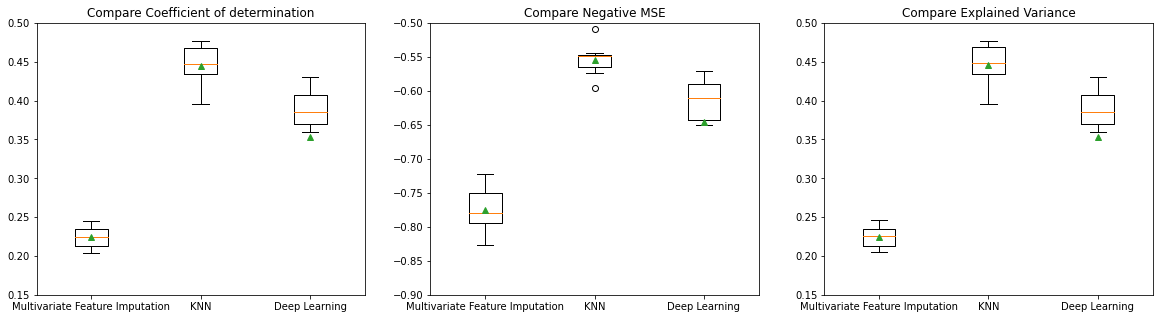

In [239]:
# Boxplots of different methods
score_r2 = [scores_bayesian['test_r2'], scores_knn['test_r2'], scores_dl[1]]
score_neg_mean_squared_error = [scores_bayesian['test_neg_mean_squared_error'], scores_knn['test_neg_mean_squared_error'], scores_dl[0]]
score_explained_variance = [scores_bayesian['test_explained_variance'], scores_knn['test_explained_variance'], scores_dl[2]]
# Import libraries 
import matplotlib.pyplot as plt 
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5)) 
  
# Creating plot 
# r2
axes[0].boxplot(score_r2,showmeans=True) 
axes[0].set_xticklabels(['Multivariate Feature Imputation', 'KNN',  
                    'Deep Learning']) 
axes[0].set_title("Compare Coefficient of determination")
axes[0].set_ylim((0.15,0.5))

# neg_mean_squared_error
axes[1].boxplot(score_neg_mean_squared_error,showmeans=True) 
axes[1].set_xticklabels(['Multivariate Feature Imputation', 'KNN',  
                    'Deep Learning']) 
axes[1].set_title("Compare Negative MSE")
axes[1].set_ylim((-0.9,-0.5))

# explained_variance
axes[2].boxplot(score_explained_variance,showmeans=True) 
axes[2].set_xticklabels(['Multivariate Feature Imputation', 'KNN',  
                    'Deep Learning']) 
axes[2].set_title("Compare Explained Variance")
axes[2].set_ylim((0.15,0.5))


# show plot 
plt.show() 